In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# dataset yg digunakan adalah dataset rockpaperscrissors yang telah dipisahkan antara data training & validation
# dengan perbandingan 8 : 2, kemudian diupload ke g-drive
# link: https://drive.google.com/file/d/1yi-81Ni0IJA1OMV_VC9FqetKT0zc05c-/view?usp=sharing
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [10]:
!ls '/content/gdrive/My Drive/sample_data/'

clean_vs_messy.zip  rockpaperscissors82.zip  rockpaperscissors.zip


In [11]:
import zipfile
local_zip = '/content/gdrive/My Drive/sample_data/rockpaperscissors82.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/gdrive/My Drive/sample_data/rockpaperscissors/')
zip_ref.close()

In [14]:
import os
base_dir = '/content/gdrive/My Drive/sample_data/rockpaperscissors/rockpaperscissors82/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [15]:
os.listdir('/content/gdrive/My Drive/sample_data/rockpaperscissors/rockpaperscissors82/images/train')

['paper', 'rock', 'scissors']

In [16]:
os.listdir('/content/gdrive/My Drive/sample_data/rockpaperscissors/rockpaperscissors82/images/val')

['paper', 'rock', 'scissors']

In [17]:
train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')

validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [18]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    width_shift_range=20,
                    height_shift_range=20,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    width_shift_range=20,
                    height_shift_range=20,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [19]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(100, 150), 
        batch_size=32,
        color_mode='grayscale',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(100, 150),
        batch_size=32,
        color_mode='grayscale',
        class_mode='categorical')

Found 1758 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [45]:
class stopCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAkurasi telah mencapai 92%!")
      self.model.stop_training = True
callbacks = stopCallback()

In [46]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=30,
      validation_data=validation_generator,
      validation_steps=5, 
      callbacks=[callbacks],
      verbose=2)

Epoch 1/30
25/25 - 26s - loss: 1.1711 - accuracy: 0.3650 - val_loss: 1.0961 - val_accuracy: 0.3625
Epoch 2/30
25/25 - 25s - loss: 1.0997 - accuracy: 0.3885 - val_loss: 1.0907 - val_accuracy: 0.4250
Epoch 3/30
25/25 - 25s - loss: 1.0885 - accuracy: 0.4437 - val_loss: 0.9950 - val_accuracy: 0.5625
Epoch 4/30
25/25 - 25s - loss: 0.9730 - accuracy: 0.5288 - val_loss: 0.8072 - val_accuracy: 0.7063
Epoch 5/30
25/25 - 29s - loss: 0.8472 - accuracy: 0.6153 - val_loss: 0.6587 - val_accuracy: 0.7125
Epoch 6/30
25/25 - 25s - loss: 0.7465 - accuracy: 0.6825 - val_loss: 0.6968 - val_accuracy: 0.7125
Epoch 7/30
25/25 - 25s - loss: 0.6313 - accuracy: 0.7400 - val_loss: 0.4740 - val_accuracy: 0.8562
Epoch 8/30
25/25 - 25s - loss: 0.4846 - accuracy: 0.8188 - val_loss: 0.3607 - val_accuracy: 0.8875
Epoch 9/30
25/25 - 25s - loss: 0.4612 - accuracy: 0.8213 - val_loss: 0.2406 - val_accuracy: 0.9250
Epoch 10/30
25/25 - 25s - loss: 0.3162 - accuracy: 0.8963 - val_loss: 0.5239 - val_accuracy: 0.7563
Epoch 11/

In [47]:
import matplotlib.pyplot as plt

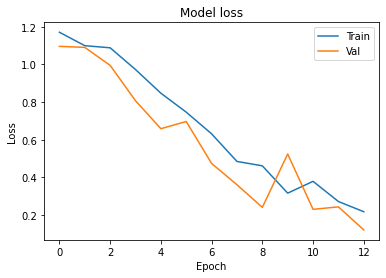

In [48]:
fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

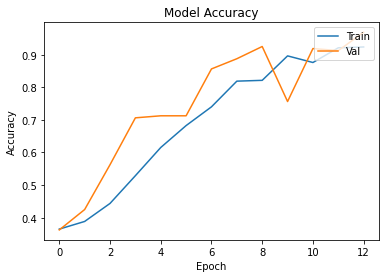

In [49]:
fig, ax = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [50]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmp8v8j6d01/assets


In [52]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)